# Learning about spatial data and maps for archaeology (and other things)

### Spatial Thinking and Skills Exercise 1 for Archaeology of Scotland

#### Made by Rachel Opitz, Archaeology, University of Glasgow

With friendly ammendments by Shawn Graham

Archaeologists regularly work with maps and data about where sites, samples and objects are found. We ask lots of questions that have a spatial component. Examples of archaeological questions about space and place include: Which Bronze Age cairns are close to the coast in England? In this excavation, is bone found inside a building or outside in the yard? In archaeology space and place matter. It's important to learn to work with spatial data and maps in order to succeed in a variety of careers in archaeology and heritage management. 

In this exercise, you will be looking at a group of Medieval burials from the [Carmelite Monastery at Linlithgow](https://canmore.org.uk/site/49244/linlithgow-carmelite-friary). Archaeologists studying cemeteries might want to know which way the burials are oriented (north to south vs east to west) and if all the burials are oriented the same way. In studying a cemetery you might also want to investigate whether any burials physically overlap other burials, implying they took place at two different times. If you're thinking about family groups, you might want to check whether adults and infants and men and women are buried near one another. All these questions have a spatial component, so you need to work with spatial data to be able to answer them.

The aim of this exercise is for you to:
* learn to make very simple static maps
* learn to ask simple questions using spatial data. This is sometimes referred to as 'writing queries'.
* start thinking about the importance of spatial relationships and data in archaeology. 

**Here's what you need to do**: Work your way down the page, carefully reading the notes and comments in each cell (each box on the page) and looking through the code. Anything written with a # symbol in front of it is a comment I've included to explain to you what the code is doing. Comments will appear in blue type. Code will be a mix of black, green and purple type. In jupyter notebooks you hit 'Ctrl+Enter' to execute the code in each cell. Once you have read and understood the comments and code hit 'Ctrl+Enter' to execute the code and then think about the results. 

You can make changes to the code to ask different questions. Simply double click in the cell to be able to type in it, make your changes, and re-run the code by simply hitting 'Ctrl+Enter' in the cell again. For example, if you started with code that searched for all the burials where the sex is 'female' you could change the bit of the code that says 'female' to 'male' to search for the male burials. If things go wrong, 'ctrl+z' will undo your changes and you can try again!

### Let's get started... Remember, hit 'Ctrl'+'Enter' to run the code in any cell in the page.

![The map that came to life](https://c1.staticflickr.com/4/3017/2863068137_055aef279a_b.jpg)

### We'll start by adding some of the tools we will need. They're not quite like these tools...

![They're not quite like these tools...](https://facetsarchaeology.files.wordpress.com/2016/07/dsc01218.jpg?w=664&h=429)

In [1]:
# Start loading your tools by telling the notebook to 'import' them (from the internet).

%matplotlib inline
!pip install descartes
!pip install fiona
!pip install geopandas

import descartes
import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets

# These are what we call prerequisites. They are basic toosl you need to get started.
# Pandas manipulate data. Geo-pandas manipulate geographic data. They're also black and white and like to eat bamboo... 
# You need these to manipulate your data!
# Fiona helps with geographic data.
# Requests are for asking for things. It's good to be able to ask for things.
# ipywidgets supports interactivity. 
# Matplotlib is your tool for drawing graphs and basic maps. You need this!


# Remember to click inside this box and hit Ctrl+Enter to make things happen!

   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   --- ------------------------------------ 2.4/24.5 MB 14.9 MB/s eta 0:00:02
   ------- -------------------------------- 4.7/24.5 MB 13.0 MB/s eta 0:00:02
   ------------- -------------------------- 8.1/24.5 MB 14.4 MB/s eta 0:00:02
   ------------------ --------------------- 11.5/24.5 MB 15.0 MB/s eta 0:00:01
   ------------------------- -------------- 15.5/24.5 MB 16.0 MB/s eta 0:00:01
   ------------------------------- -------- 19.1/24.5 MB 16.3 MB/s eta 0:00:01
   ------------------------------------ --- 22.5/24.5 MB 16.6 MB/s eta 0:00:01
   ---------------------------------------- 24.5/24.5 MB 16.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ------ --------------------------------- 3.1/19.2 MB 16.8 MB/s eta 0:00:01
   -------------- ------------------------- 6.8/19.2 MB 17.5 MB/s eta 0:00:01
   ----------------------- ---------------- 11.3/19.2 MB 19.0 MB/s eta 0:00

### Now that we have the basic tools loaded up we need some data. This data is from the Linlithgow Carmetlite Monastery Cemetery excavations, and can be downloaded from the Archaeological Data Service (ADS).

The [ADS](http://archaeologydataservice.ac.uk/) is an archaeological archive that provides data on an open access basis. You can learn more about the Linlithgow excavations dataset, which is part of the 'Medieval Monastic Cemeteries of Britain (1050-1600)' Project [here](http://archaeologydataservice.ac.uk/archives/view/cemeteries_ahrb_2005/index.cfm). 

In [2]:
url = 'https://raw.githubusercontent.com/ropitz/spatialarchaeology/master/data/lintlithgow.geojson'
# This is where I put the data. It's in a format called geojson, used to represent geometry (shapes) and attributes (text).
# Geojson is a common format for spatial data, especially if it is being shared online.

request = requests.get(url)
# Please get me the data at that web address (url)

b = bytes(request.content)
# I will use the letter 'b' to refer to the data, like a nickname. 
# In this step, I am reading the stuff on the page the url (web address ) points to

with fiona.BytesCollection(b) as f:
    crs = f.crs
    linlithgow_burials = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(linlithgow_burials.head())
# In this step I will use the fiona tool to wrap up all the data from 'b' into a tidy package. 
# Then I check the coordinate system (crs) listed in the file
# and print out the first few lines of the file so I can check everything looks ok. 
# Don't worry if you don't understand all the details of this part!



                                            geometry  context  EARLIEST_DATE  \
0  LINESTRING Z (0.757 15.466 0, 0.757 15.531 0, ...      331           1400   
1  LINESTRING Z (1.037 15.512 0, 1.036 15.525 0, ...      331           1400   
2      LINESTRING Z (1.046 15.503 0, 1.558 15.466 0)      331           1400   
3  LINESTRING Z (4.289 14.642 0, 4.289 14.754 0, ...      146           1400   
4  LINESTRING Z (4.622 14.604 0, 4.621 14.624 0, ...      146           1400   

   LATEST_DATE   AGE_AT_DEATH  BURIAL_POSITION     SEX GRAVE_SHAPE  \
0         1560  ADULT (26-45)  SUPINE EXTENDED  FEMALE     ROUNDED   
1         1560  ADULT (26-45)  SUPINE EXTENDED  FEMALE     ROUNDED   
2         1560  ADULT (26-45)  SUPINE EXTENDED  FEMALE     ROUNDED   
3         1560  ADULT (26-45)  SUPINE EXTENDED  FEMALE     ROUNDED   
4         1560  ADULT (26-45)  SUPINE EXTENDED  FEMALE     ROUNDED   

              COMMENTS  
0  NORTH OF HIGH ALTAR  
1  NORTH OF HIGH ALTAR  
2  NORTH OF HIGH ALTAR 

### Does that look right? 

You should have a bunch of information in a 'geometry' column that describes the shapes of lines. These are the outlines of the shape of each burial and a 'stick figure' type skeleton for some of them of the contexts from Linlithgow. You should also have a bunch of descriptions and information about the burials. Importantly you should be able to spot the column names. Look for 'COMMENTS' and 'AGE_AT_DEATH' and 'GRAVE_SHAPE'. You should also be able to see 'context' which is a unique identifier for each burial. Each column contains a different type of information.

### What's the lesson here?
Spatial data by itself isn't that useful. If we just had a bunch of lines and no descriptions of them we couldn't say much about the archaeological features at Linlithgow's cemetery. It's the combination of spatial and descriptive data that is interesting.

Right now you have your spatial and descritive data as a table. It's hard to read spatial data as just a list of numbers and understand the shapes that are being described. Let's visualise the data as a map to better understand the spatial information. 

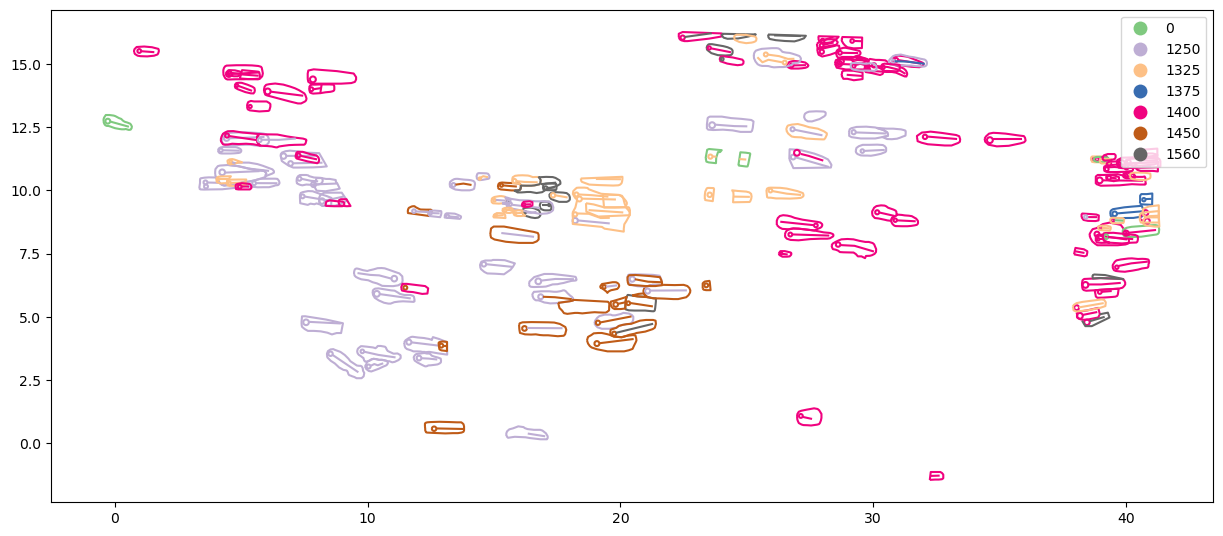

In [3]:
# We are going to run a bit of code that tells the software to draw the shapes of the burials as a map. 

linlithgow_map1 = linlithgow_burials.plot(column='EARLIEST_DATE', categorical = True, cmap='Accent', figsize=(15, 8),
                   legend = True);

# Let's break down that command.
# 'plot' means draw me a map showing the geometry of each feature in my data (linlithgow_burials, which we created in the previous cell). 
# We want to control things like the color of different types of burials on our map. 
# I used the 'Accent' colorscale command (cmap stands for 'colour map') 
# and asked it to draw the polygons differently based on the type of earliest possible date at which each burial took place. 
# The 'EARLIEST_DATE' column, you can see in the table, lists the earliest possible date for each burial
# I also told it to make my figure 15x8 in size (figsize) and to show us a legend so we can see which date goes with which colour.


### Why not play around with the colours on the map? Try changing the 'cmap' value to something other than 'Accent'. 

Remember, you just double click in the cell to be able to type, change the items you want to modify, and hit 'Ctrl+Enter' again.

Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

### Well done! You just made your first archaeological map. It shows all the  burials excavated at Carmelite Linlithgow. 

This is good, but what if you only want to look at one kind of burial? We can select specific types of burials from within our dataset by searching (aka querying) for them. 

How do we know what kind of burials we have? Looking at what's inside the data describing all those shapes on the map should help. 

Start by printing out our data in a tidy way. Just type its name...

In [4]:
linlithgow_burials
# Typing the name of any dataset will print it out

,geometry,context,EARLIEST_DATE,LATEST_DATE,AGE_AT_DEATH,BURIAL_POSITION,SEX,GRAVE_SHAPE,COMMENTS
0,"LINESTRING Z (0.757 15.466 0, 0.757 15.531 0, ...",331,1400,1560,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,NORTH OF HIGH ALTAR
1,"LINESTRING Z (1.037 15.512 0, 1.036 15.525 0, ...",331,1400,1560,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,NORTH OF HIGH ALTAR
2,"LINESTRING Z (1.046 15.503 0, 1.558 15.466 0)",331,1400,1560,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,NORTH OF HIGH ALTAR
3,"LINESTRING Z (4.289 14.642 0, 4.289 14.754 0, ...",146,1400,1560,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,NORTH OF HIGH ALTAR
4,"LINESTRING Z (4.622 14.604 0, 4.621 14.624 0, ...",146,1400,1560,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,NORTH OF HIGH ALTAR
...,...,...,...,...,...,...,...,...,...
434,"LINESTRING Z (29.11 14.96 0, 29.105 14.897 0, ...",96,1250,1560,NO AGE,None,UNK,NOT DEFINITIVE,"NO RECORD, JUST PLAN LOCATION"
435,"LINESTRING Z (30.315 14.878 0, 30.324 14.941 0...",132,1400,1560,IMMATURE (11-15),SUPINE EXTENDED,UNK,NOT DEFINITIVE,None
436,"LINESTRING Z (5.227 13.32 0, 5.234 13.266 0, 5...",154,1400,1560,IMMATURE (11-15),SUPINE EXTENDED,UNK,NOT DEFINITIVE,None
437,"LINESTRING Z (7.626 14.409 0, 7.65 14.291 0, 7...",169,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,None


In archaeology we often talk about the dates at which different things happened, and when activities started and ended. Sometimes we are not sure when something happened, so we give a range of dates with an early guess and a late guess. Look at the 'earliest_date' and 'latest_date' columns in the table, and you'll see the date ranges guessed for each burial.

In [5]:
# Say you only want to look at the burials with a latest date before 1400 because you are only interested in earlier burials.
# Pandas use square brackets [] to make selections within a dataset. 
# Here we select all the rows (.loc) where the column 'LATEST_DATE' has a value less than 1400. < means 'less than' in code

linlithgow_burials.loc[linlithgow_burials['LATEST_DATE']<1400]

,geometry,context,EARLIEST_DATE,LATEST_DATE,AGE_AT_DEATH,BURIAL_POSITION,SEX,GRAVE_SHAPE,COMMENTS
15,"LINESTRING Z (-0.45 12.813 0, -0.428 12.88 0, ...",205,0,0,None,None,None,None,None
16,"LINESTRING Z (-0.188 12.736 0, -0.19 12.753 0,...",205,0,0,None,None,None,None,None
17,"LINESTRING Z (-0.187 12.721 0, 0.553 12.515 0)",205,0,0,None,None,None,None,None
18,"LINESTRING Z (5.162 11.806 0, 4.843 11.79 0, 4...",162,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,None
19,"LINESTRING Z (4.528 12.068 0, 4.526 12.087 0, ...",162,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,None
...,...,...,...,...,...,...,...,...,...
416,"LINESTRING Z (37.909 5.355 0, 37.925 5.256 0, ...",24,1325,1375,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,None
417,"LINESTRING Z (38.131 5.367 0, 39.117 5.538 0)",24,1325,1375,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,None
418,"LINESTRING Z (38.609 11.241 0, 38.658 11.127 0...",43,1325,1375,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,None
419,"LINESTRING Z (38.838 11.322 0, 39.05 11.322 0,...",44,0,0,None,None,None,None,None


<Axes: >

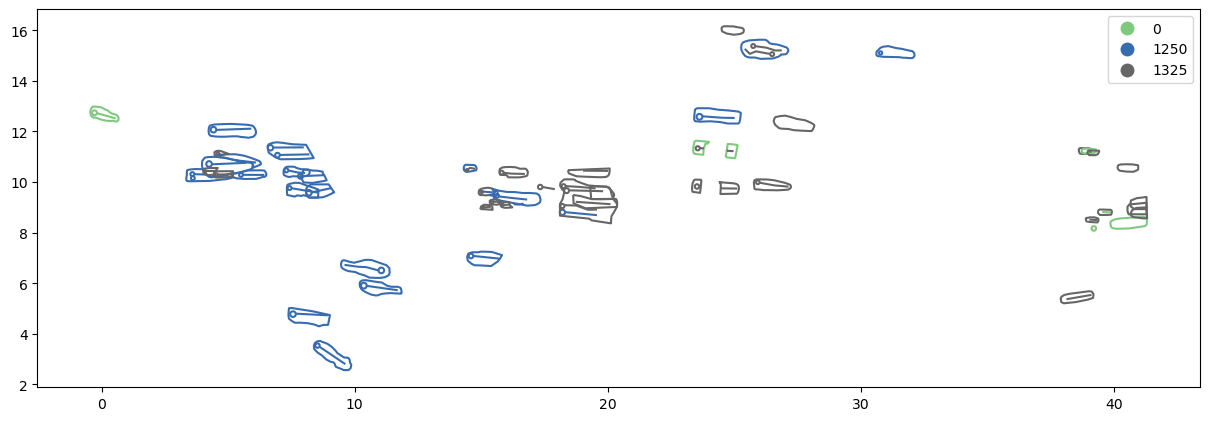

In [6]:
# You should have a table view of the data and if you look at the 'LATEST_DATE' column, you should only see dates before 1400.
# If we want to see this result as a map, we just add the .plot command to the end of what we typed before.
# Remember to include the options to control the style of your map, like you did earlier.

linlithgow_burials.loc[linlithgow_burials['LATEST_DATE'] <1400].plot(column='EARLIEST_DATE', categorical = True, cmap='Accent', figsize=(15, 8), legend = True)

# Note that I've used many of the same commands that I used before to control the color of the features and the map size.

In [7]:
# Try and do the same thing for burials that are earlier than 1500
linlithgow_burials.loc[(linlithgow_burials['LATEST_DATE']<=1500) & (linlithgow_burials['LATEST_DATE'] >= 1400)]

,geometry,context,EARLIEST_DATE,LATEST_DATE,AGE_AT_DEATH,BURIAL_POSITION,SEX,GRAVE_SHAPE,COMMENTS
59,"LINESTRING Z (9.907 2.971 0, 9.965 2.912 0, 10...",190,1250,1450,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,HEAD AT EAST END OF GRAVE
60,"LINESTRING Z (10.113 3.03 0, 10.111 3.043 0, 1...",190,1250,1450,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,HEAD AT EAST END OF GRAVE
61,"LINESTRING Z (10.122 3.059 0, 10.26 3.128 0, 1...",190,1250,1450,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,HEAD AT EAST END OF GRAVE
62,"LINESTRING Z (9.632 3.755 0, 9.73 3.833 0, 9.7...",195,1250,1450,IMMATURE (11-15),SUPINE EXTENDED,UNK,ROUNDED,None
63,"LINESTRING Z (9.858 3.629 0, 9.857 3.641 0, 9....",195,1250,1450,IMMATURE (11-15),SUPINE EXTENDED,UNK,ROUNDED,None
...,...,...,...,...,...,...,...,...,...
325,"LINESTRING Z (40.77 9.63 0, 40.769 9.641 0, 40...",2,1375,1400,ADULT (26-45),SUPINE EXTENDED,UNK,ANGULAR,"ONE OF MIX OF ARTIC (75, 76, 106, 108) AND DIS..."
326,"LINESTRING Z (40.77 9.654 0, 41.007 9.662 0)",2,1375,1400,GENERAL ADULT,SUPINE EXTENDED,MALE,ANGULAR,"ONE OF MIX OF ARTIC (75, 76, 106, 108) AND DIS..."
327,"LINESTRING Z (40.623 9.386 0, 40.24 9.357 0, 3...",4,1375,1400,GENERAL ADULT,SUPINE EXTENDED,MALE,ANGULAR,"ONE OF MIX OF ARTIC (75, 76, 106, 108) AND DIS..."
328,"LINESTRING Z (39.641 9.071 0, 39.64 9.086 0, 3...",4,1375,1400,OLD ADULT (46+),SUPINE EXTENDED,MALE?,ANGULAR,"ONE OF MIX OF ARTIC (75, 76, 106, 108) AND DIS..."


<Axes: >

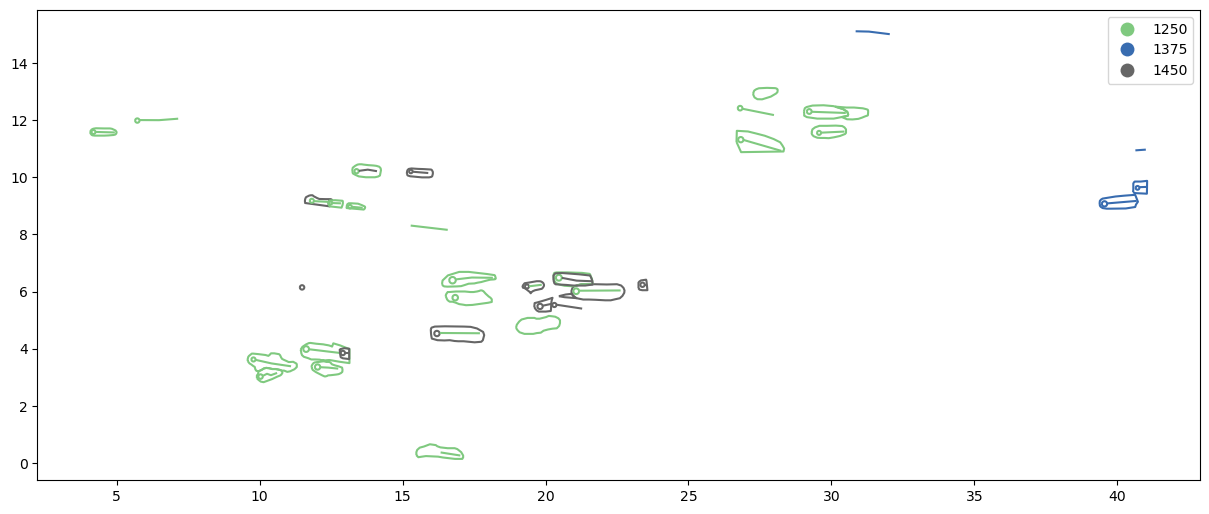

In [8]:
# Remember to draw it as a map!
linlithgow_burials.loc[(linlithgow_burials['LATEST_DATE']<=1500) & (linlithgow_burials['LATEST_DATE'] >= 1400)].plot(column='EARLIEST_DATE', categorical = True, cmap='Accent', figsize=(15, 8), legend = True)

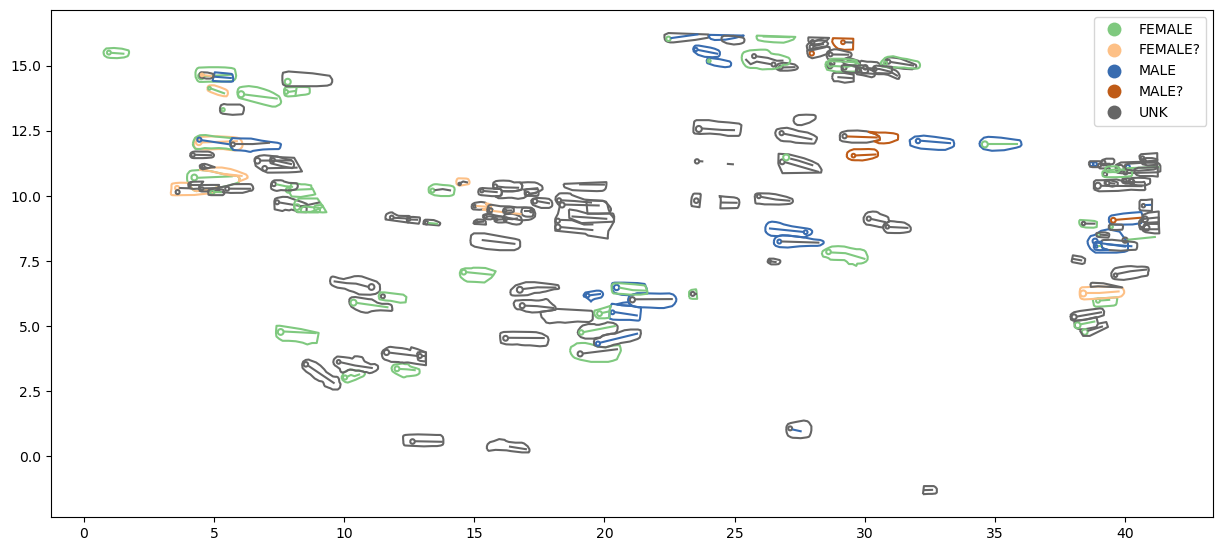

In [9]:
# It might be interesting to see if the burials are arranged by sex. 
# We can plot each of these maps coloring each burial based on whether it is male or female.

linlithgow_sexed = linlithgow_burials.loc[linlithgow_burials['SEX'].isin(['UNK','MALE?','MALE','FEMALE','FEMALE?'])]
linlithgow_sexed.plot(column='SEX', categorical = True, cmap='Accent', figsize=(15, 8), legend = True);

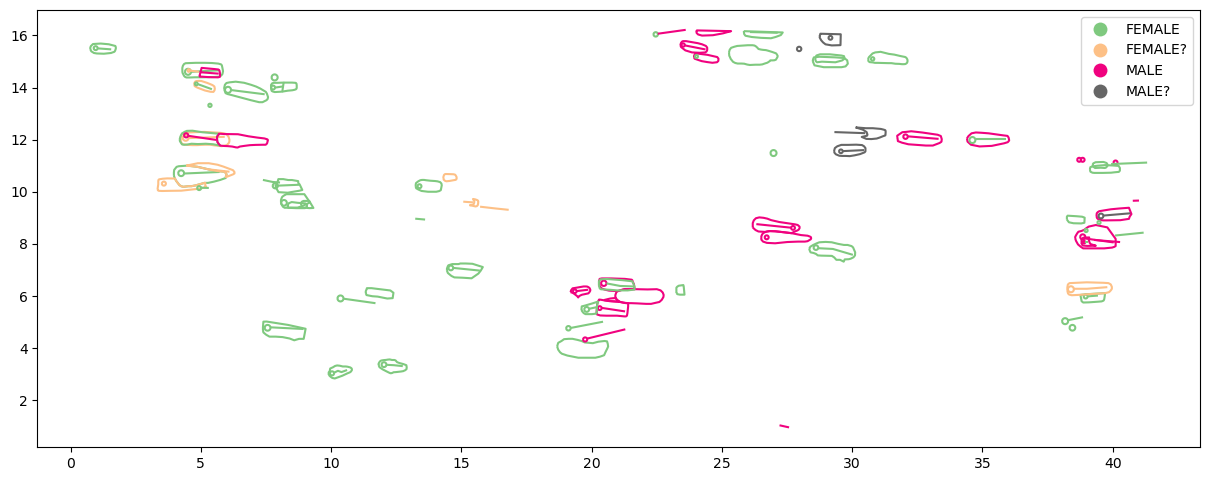

In [10]:
# There area a lot of 'UNK' unknown sex burials cluttering up the map. 
# Remove them by not including them in our 'isin' list of valid options for sex.
linlithgow_sexed = linlithgow_burials.loc[linlithgow_burials['SEX'].isin(['MALE?','MALE','FEMALE','FEMALE?'])]
linlithgow_sexed.plot(column='SEX', categorical = True, cmap='Accent', figsize=(15, 8), legend = True);

Do you think you see male and female burials in their own areas, or do they cluster together? What might a division between genders suggest about burial practices?

What if you wanted to map by age at death? How would you know the available options? We can usually have a good guess at the valid options for gender by looking at the table, but how an archaeologist divides up their 'age at death' category is less clear.

In [11]:
# One quick way to do this is to use the 'groupby' command.
# It shows the groups of values in the 'AGE_AT_DEATH' column.
linlithgow_burials.groupby('AGE_AT_DEATH').count()

,geometry,context,EARLIEST_DATE,LATEST_DATE,BURIAL_POSITION,SEX,GRAVE_SHAPE,COMMENTS
AGE_AT_DEATH,,,,,,,,
ADULT (26-45),137,137,137,137,137,135,137,55
FOETAL,11,11,11,11,11,11,11,3
GENERAL ADULT,12,12,12,12,12,12,12,9
GENERAL IMMATURE,7,7,7,7,7,7,7,2
IMMATURE (11-15),36,36,36,36,36,36,36,10
INFANT (0-5),127,127,127,127,127,127,127,22
JUVENILE (6-10),35,35,35,35,35,35,35,6
NO AGE,6,6,6,6,4,6,6,6
OLD ADULT (46+),20,20,20,20,20,20,20,3


In [12]:

# We can also ask to see the number and breakdown of items in any of the other categories using .count()
adult_burials = linlithgow_burials.loc[linlithgow_burials['AGE_AT_DEATH'].isin(['ADULT (26-45)'])]
adult_burials.groupby('GRAVE_SHAPE').count()

,geometry,context,EARLIEST_DATE,LATEST_DATE,AGE_AT_DEATH,BURIAL_POSITION,SEX,COMMENTS
GRAVE_SHAPE,,,,,,,,
ANGULAR,19,19,19,19,19,19,17,13
NOT DEFINITIVE,34,34,34,34,34,34,34,8
ROUNDED,84,84,84,84,84,84,84,34


In [13]:
infant_burials = linlithgow_burials.loc[linlithgow_burials['AGE_AT_DEATH'].isin(['INFANT (0-5)'])]
infant_burials.groupby('GRAVE_SHAPE').count()

,geometry,context,EARLIEST_DATE,LATEST_DATE,AGE_AT_DEATH,BURIAL_POSITION,SEX,COMMENTS
GRAVE_SHAPE,,,,,,,,
ANGULAR,4,4,4,4,4,4,4,4
NOT DEFINITIVE,49,49,49,49,49,49,49,6
ROUNDED,74,74,74,74,74,74,74,12


### pause and consider
Which grave shapes are the most common? Are the common grave shapes the same when you look at adults vs. infants or are they different? 

** add a new cell after this one ** Click on this cell to make sure it's highlighted, then hit the + sign above. With your cursor in the new cell, hit the dropdown beside where it says 'code' and change it to 'markdown'. Write your observations down.

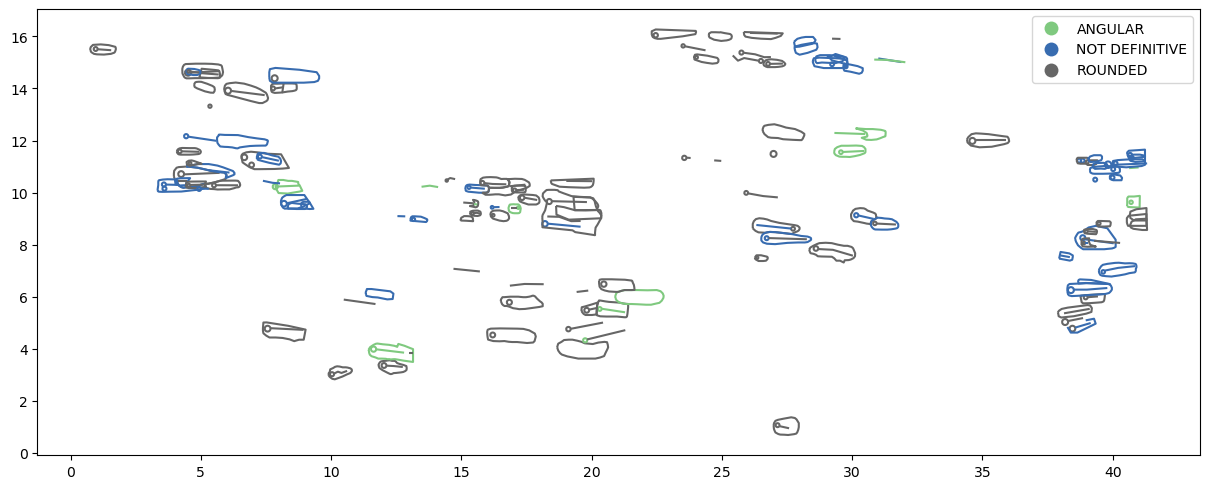

In [14]:
#Let's plot the adults and the infants and colour by grave shape

linlithgow_aged = linlithgow_burials.loc[linlithgow_burials['AGE_AT_DEATH'].isin(['ADULT (26-45)','INFANT (0-5)'])]
linlithgow_aged.plot(column='GRAVE_SHAPE', categorical = True, cmap='Accent', figsize=(15, 8), legend = True);



What do you conclude here. Is there a relationship between age at death and grave shape? 

In [16]:
# Let's save these selections of 'pre1400' and 'pre1500' so we can use them again.
# I've given them names here. These are now 'named variables'
pre1400 = linlithgow_burials.loc[linlithgow_burials['LATEST_DATE'] <1400]
pre1500 = linlithgow_burials.loc[(linlithgow_burials['LATEST_DATE']<=1500) & (linlithgow_burials['LATEST_DATE'] >= 1400)]

In [17]:
#Test your named variable by printing it out again, calling it by its name.
pre1400

,geometry,context,EARLIEST_DATE,LATEST_DATE,AGE_AT_DEATH,BURIAL_POSITION,SEX,GRAVE_SHAPE,COMMENTS
15,"LINESTRING Z (-0.45 12.813 0, -0.428 12.88 0, ...",205,0,0,None,None,None,None,None
16,"LINESTRING Z (-0.188 12.736 0, -0.19 12.753 0,...",205,0,0,None,None,None,None,None
17,"LINESTRING Z (-0.187 12.721 0, 0.553 12.515 0)",205,0,0,None,None,None,None,None
18,"LINESTRING Z (5.162 11.806 0, 4.843 11.79 0, 4...",162,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,None
19,"LINESTRING Z (4.528 12.068 0, 4.526 12.087 0, ...",162,1250,1325,YOUNG ADULT (16-25),SUPINE EXTENDED,FEMALE?,ROUNDED,None
...,...,...,...,...,...,...,...,...,...
416,"LINESTRING Z (37.909 5.355 0, 37.925 5.256 0, ...",24,1325,1375,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,None
417,"LINESTRING Z (38.131 5.367 0, 39.117 5.538 0)",24,1325,1375,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,None
418,"LINESTRING Z (38.609 11.241 0, 38.658 11.127 0...",43,1325,1375,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,None
419,"LINESTRING Z (38.838 11.322 0, 39.05 11.322 0,...",44,0,0,None,None,None,None,None


In [18]:
#Test your other named variable by printing it out again, calling it by its name.
pre1500

,geometry,context,EARLIEST_DATE,LATEST_DATE,AGE_AT_DEATH,BURIAL_POSITION,SEX,GRAVE_SHAPE,COMMENTS
59,"LINESTRING Z (9.907 2.971 0, 9.965 2.912 0, 10...",190,1250,1450,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,HEAD AT EAST END OF GRAVE
60,"LINESTRING Z (10.113 3.03 0, 10.111 3.043 0, 1...",190,1250,1450,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,HEAD AT EAST END OF GRAVE
61,"LINESTRING Z (10.122 3.059 0, 10.26 3.128 0, 1...",190,1250,1450,ADULT (26-45),SUPINE EXTENDED,FEMALE,ROUNDED,HEAD AT EAST END OF GRAVE
62,"LINESTRING Z (9.632 3.755 0, 9.73 3.833 0, 9.7...",195,1250,1450,IMMATURE (11-15),SUPINE EXTENDED,UNK,ROUNDED,None
63,"LINESTRING Z (9.858 3.629 0, 9.857 3.641 0, 9....",195,1250,1450,IMMATURE (11-15),SUPINE EXTENDED,UNK,ROUNDED,None
...,...,...,...,...,...,...,...,...,...
325,"LINESTRING Z (40.77 9.63 0, 40.769 9.641 0, 40...",2,1375,1400,ADULT (26-45),SUPINE EXTENDED,UNK,ANGULAR,"ONE OF MIX OF ARTIC (75, 76, 106, 108) AND DIS..."
326,"LINESTRING Z (40.77 9.654 0, 41.007 9.662 0)",2,1375,1400,GENERAL ADULT,SUPINE EXTENDED,MALE,ANGULAR,"ONE OF MIX OF ARTIC (75, 76, 106, 108) AND DIS..."
327,"LINESTRING Z (40.623 9.386 0, 40.24 9.357 0, 3...",4,1375,1400,GENERAL ADULT,SUPINE EXTENDED,MALE,ANGULAR,"ONE OF MIX OF ARTIC (75, 76, 106, 108) AND DIS..."
328,"LINESTRING Z (39.641 9.071 0, 39.64 9.086 0, 3...",4,1375,1400,OLD ADULT (46+),SUPINE EXTENDED,MALE?,ANGULAR,"ONE OF MIX OF ARTIC (75, 76, 106, 108) AND DIS..."


So far these searches have been about the attributes of our data, or the way each context has been described. You could try selecting on different attributes to ask your own questions, following the pattern of commands we used above. For example, you could search for a specific type of burial, or for burials later than a certain date. 

We can also ask questions about spatial relationships between contexts or about the real-world location of our contexts. For example, we could try and find out the location of our whole data. To describe the location of the whole dataset, we might draw a box around all the features. This is called a 'bounding box'. Let's find the bounding box, or real world location and extent of our data. We use the command 'total_bounds' to ask this question. Things 'in bounds' are inside the box.

In [19]:
pre1400.total_bounds

array([-0.44993622,  2.56715295, 41.31863521, 16.15619505])

You should see a set of coordinates that represent the location of your data in a local coordinate system. The coordinates are in meters, representing how far away each burial is from a point that the archaeologists working at the site declared to have the value (0,0,0). 

This is less than ideal, as what you really want are the OSGB coordiantes. OSGB is one of the most common coordinate systems in the UK, and would give you real world references, like those your GPS in your phone uses to navigate. You can learn more about coordinate systems [here](https://www.e-education.psu.edu/natureofgeoinfo/c2_p10.html) and [here](https://www.e-education.psu.edu/natureofgeoinfo/c2_p11.html).

Why does this matter? Well, if you wanted to get out a map and find the location of this cemetery so you could go visit the place, you would need the coordinates. If you wanted to tell someone else where they were, or tell a planner the area where they should not build a road, you would need the coordiantes to do so. Lots of excavations make up their own coordinate system or 'local grid'. If you become an archaeologist, please try to avoid doing this. 

In [20]:
# Now do the same thing for the pre-1500 burials. The results should be similar, but not identical.

pre1500.total_bounds

# Take a minute and think about why this would be the case.

array([ 4.08110118,  0.15121173, 41.04023533, 15.10604186])

<Axes: >

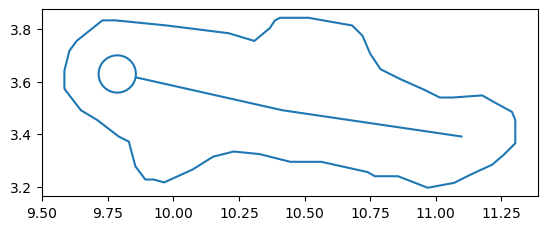

In [21]:
# So far we have been asking questions about groups of features of different types. 
# We can also ask spatial questions about single contexts or burials.
# Now we will select a single burial by the context number assigned to it.

pre1500_195 = pre1500.loc[pre1500['context']== 195]
pre1500_195
pre1500_195.plot()

<Axes: >

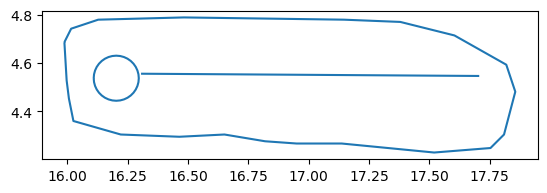

In [22]:
#Now we will select another specific burial.
pre1500_189 = pre1500.loc[pre1500['context'] == 189]
pre1500_189
pre1500_189.plot()

### One of these burials is immature (a young person) while one is identified as an older person.
 
What kinds of spatial questions can we ask by comparing individual burials? We might ask if they are they different shapes or sizes, or facing different directions. Look at the maps and try and spot any differences. Orientation is easy enough, but it's hard to compare size when the burials are on different maps. Putting the individual burials we want to compare on the same map will make it easier.

<Axes: >

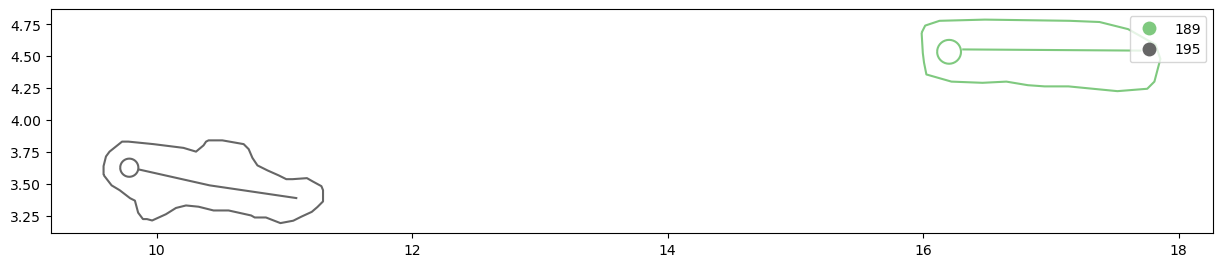

In [23]:
# To do this we have to provide a list of the values we are interested in seeing on the map, in square brackets []
pre1500_both= pre1500.loc[pre1500['context'].isin([195,189])]
pre1500_both
pre1500_both.plot(column='context', categorical = True, cmap='Accent', figsize=(15, 8), legend = True)

What does this map suggest? Are there any size, shape or orientation differences in these burials? What might similarities or differences mean?

### Now try another question. What if we wanted to find all the contexts defined as infant burials? 

Look in the 'Age_at_Death' column. Infants are defined as 'INFANT (0-5)'. In many archaeological situations infants are buried differently. Perhaps they are in a separate area, or always close to an adult. These are interesting questions to investigate spatially.

In [24]:
linlithgow_infants = linlithgow_burials[linlithgow_burials['AGE_AT_DEATH'].str.contains('INFANT', na= False)]
linlithgow_infants
# The command .str.contains means that we want all the contexts where the word 'infant' appears anywhere in the AGE_AT_DEATH column.
# It doesn't have to be an exact match, which is useful as archaeological data is often a little inconsistent or untidy.
# Speaking of untidy data, the 'na=False' bit tells the code to ignore rows where no data has been entered for AGE_AT_DEATH.


,geometry,context,EARLIEST_DATE,LATEST_DATE,AGE_AT_DEATH,BURIAL_POSITION,SEX,GRAVE_SHAPE,COMMENTS
28,"LINESTRING Z (3.661 10.31 0, 4.138 10.296 0)",164,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,None
30,"LINESTRING Z (5.748 10.457 0, 6.193 10.461 0, ...",152,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,BURIED OUTSIDE W DOOR OF CHAPEL. 1 LACE END.
31,"LINESTRING Z (5.58 10.28 0, 5.579 10.294 0, 5....",152,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,BURIED OUTSIDE W DOOR OF CHAPEL. 1 LACE END.
32,"LINESTRING Z (5.583 10.284 0, 6.429 10.28 0)",152,1250,1325,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,BURIED OUTSIDE W DOOR OF CHAPEL. 1 LACE END.
74,"LINESTRING Z (12.987 3.846 0, 13.135 3.846 0)",171,1450,1500,INFANT (0-5),SUPINE EXTENDED,UNK,ROUNDED,None
...,...,...,...,...,...,...,...,...,...
431,"LINESTRING Z (27.79 15.507 0, 27.838 15.365 0,...",114,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,None
432,"LINESTRING Z (29.823 14.835 0, 29.822 14.846 0...",95,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,None
433,"LINESTRING Z (29.664 14.874 0, 29.664 14.757 0...",95,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,None
437,"LINESTRING Z (7.626 14.409 0, 7.65 14.291 0, 7...",169,1400,1560,INFANT (0-5),SUPINE EXTENDED,UNK,NOT DEFINITIVE,None


In [ ]:
# Now create a map of all the burials of infants.
linlithgow_infants.plot(column='LATEST_DATE', categorical = True, cmap='viridis', figsize=(15, 8), legend = True)

### What if we wanted to know about burials that were near infant burials? Let's construct a new query.
How close is close? Let's say 0.5meters. This will be a two step process...


In [ ]:
# First we use the 'buffer' command to expand the size of each line and make it 0.5m thick
# Doing this defines the area within 0.5 of each infant burial.
linlithgow_infants_close = linlithgow_infants.buffer(0.5)
linlithgow_infants_close.plot(cmap='Accent', edgecolor='grey', figsize=(15, 15))


In [ ]:
# Now we plot the intersection between the buffered infant burials shapes and all the other burials shapes.
# This result should return all the burials that physically overlap the area within 0.5 of infant burials.

burials_near_infants = linlithgow_burials[linlithgow_burials.intersects(linlithgow_infants_close.union_all())]

# Plot both layers
ax = linlithgow_infants_close.plot(color='lightblue', alpha=0.3, figsize=(15, 15), label='Infant buffer zones')
burials_near_infants.plot(ax=ax, cmap='Accent', edgecolor='grey', label='Burials near infants')
ax.set_title('Burials within 0.5m of Infant Burials')

### What do we conclude? Are infants buried close to other burials? To adults?



### This ends the tutorial. You can practice writing queries (asking questions of your data) by playing around in this notebook. Try changing values or searching for different types of burials or their dates. You'll be doing this in class during your next practical!

Hopefully you learned to:
* make very simple static maps
* ask simple questions using spatial data. This is sometimes referred to as 'writing queries'.
* start thinking about the importance of spatial relationships and data in archaeology. 
